<a href="https://colab.research.google.com/github/OttmarIvey/Analisis-de-Regresion/blob/main/Ejercicio_de_Regresi%C3%B3n_Log%C3%ADstica_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este ejercicio se usa un data set de un banco portugues despues de una camapña de marketing, el objetivo es deducir si existe una relacion entre las variables 'Duracion' y 'y' que es si el cliente realizara un deposito o no.

Primero cargamos las paqueterías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

Cargamos los datos sin filtrar en una variable

In [4]:
data = pd.read_csv('Example-bank-data.csv')
data

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
...,...,...,...
513,513,204,no
514,514,806,yes
515,515,290,no
516,516,473,yes


Creamos una copia de la variable para poder filtrar los datos. Como queremos saber si se lograron los objetivos del banco o no cambiamos las variables en y por 0 y 1.

In [9]:
data1= data.copy()
data1['y'] = data1['y'].map({'yes':1,'no':0})
data1

,Unnamed: 0,duration,y
0,0,117,0
1,1,274,1
2,2,167,0
3,3,686,1
4,4,157,0
...,...,...,...
513,513,204,0
514,514,806,1
515,515,290,0
516,516,473,1


Declaramos las varibales dependientes e independientes

In [10]:
y = data1['y']
x1 = data1['duration']

Iniciamos la regresión logística simple

In [11]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
resultados = reg_log.fit()
resultados.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.2121
Time:                        19:50:33   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

Visualizamos los resultados obtenidos

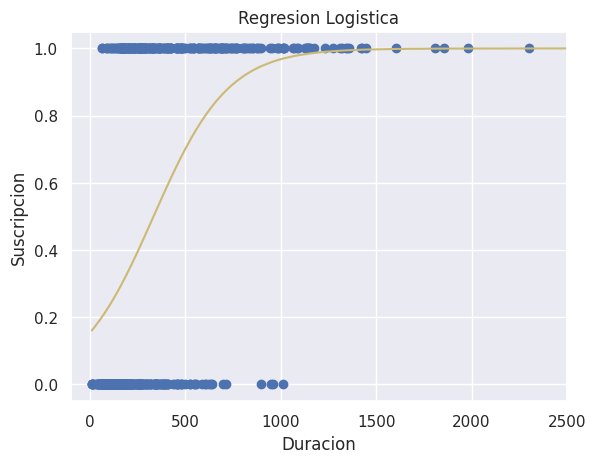

In [22]:
plt.scatter(x1,y)
plt.title('Regresion Logistica')

def log_reg(x,b0,b1):
  return(np.exp(b0 + b1*x)/(1+np.exp(b0 + b1*x)))
log_reg_sorted = np.sort(log_reg(x1,resultados.params[0],resultados.params[1]))
x_sorted = np.sort(np.array(x1))
plt.xlim(-100,2500)
plt.xlabel('Duracion')
plt.ylabel('Suscripcion')
plt.plot(x_sorted,log_reg_sorted,c='C8')
plt.show()

Podemos ver en el grafico que ciertamente existe una relación entre la duración y si el cliente realizara un deposito, sin embargo, se necesita una duración significativamente grande para que las posibilidades de que el cliente realice el deposito sea mayor al 90%.